# PROBABILIDAD DE SER CAMPEON DADO EL PAIS

# LIBS

In [1]:
# ==========================================
# Análisis completo de jugadores mundialistas
# Basado en confederación y condición de campeón
# ==========================================


from exps.loaders import Loaders
from exps.mundial_exps import Experimentos
from exps.dists import AnalisisEstadistico
import pandas as pd
import scipy.stats as stats
ld=Loaders()
exper=Experimentos()


# Cargar archivo Excel
path = './datain/Proyecto_mundial.xlsx'
df_mundial= ld.cargar_excel(path,'Sheet1')

# Inicializar clases
dist = AnalisisEstadistico(df_mundial)
exper = Experimentos()

# PROBABILIDADES EMPIRICAS

In [2]:


# ==========================================
# 1. Probabilidad frecuentista
# ==========================================
print("--- Probabilidad empírica de ser campeón ---")
p_empirica = exper.probabilidad_binaria_empirica(df_mundial, 'dummy_campeon')
print(f"P(Campeón) = {p_empirica:.4f}\n")

# ==========================================
# 2. Probabilidad conjunta y marginal
# ==========================================
print("--- Tabla de probabilidad conjunta (Seleccion vs campeón) ---")
tabla_conjunta = exper.tabla_probabilidad_conjunta(df_mundial, 'Seleccion', 'dummy_campeon')
print(tabla_conjunta)

print("\n--- Probabilidades marginales (Seleccion) ---")
p_marginal_confed = df_mundial['Seleccion'].value_counts(normalize=True)
print(p_marginal_confed)

print("\n--- Probabilidad condicional P(Campeón | Seleccion) ---")
tabla_condicional = pd.crosstab(df_mundial['Seleccion'], df_mundial['dummy_campeon'], normalize='index')
print(tabla_condicional)

# ==========================================
# 3. Independencia entre Seleccion y ser campeón
# ==========================================
print("\n--- Prueba de independencia ---")
for conf in tabla_conjunta.index:
    p_conf = p_marginal_confed[conf]
    p_conjunta = tabla_conjunta.loc[conf, 1] if 1 in tabla_conjunta.columns else 0
    esperado = p_conf * p_empirica
    print(f"{conf}: P(A∩B) = {p_conjunta:.4f}, P(A)*P(B) = {esperado:.4f}, Diferencia = {abs(p_conjunta - esperado):.4f}")




--- Probabilidad empírica de ser campeón ---
P(Campeón) = 0.0475

--- Tabla de probabilidad conjunta (Seleccion vs campeón) ---
dummy_campeon            0         1
Seleccion                           
Brasil            0.035176  0.011941
Alemania Federal  0.033348  0.009574
Italia            0.033348  0.009574
Argentina         0.033133  0.004733
Uruguay           0.023989  0.004733
...                    ...       ...
Turquía           0.004841  0.000000
Ucrania           0.002474  0.000000
Unión Soviética   0.016566  0.000000
Yugoslavia        0.020762  0.000000
Zaire             0.002367  0.000000

[80 rows x 2 columns]

--- Probabilidades marginales (Seleccion) ---
Seleccion
Brasil                            0.047117
Alemania Federal                  0.042922
Italia                            0.042922
Argentina                         0.037866
México                            0.035284
                                    ...   
Irak                              0.002367
Canadá    

# DISTRIBUCION BINOMIAL


--- Distribución Binomial ---


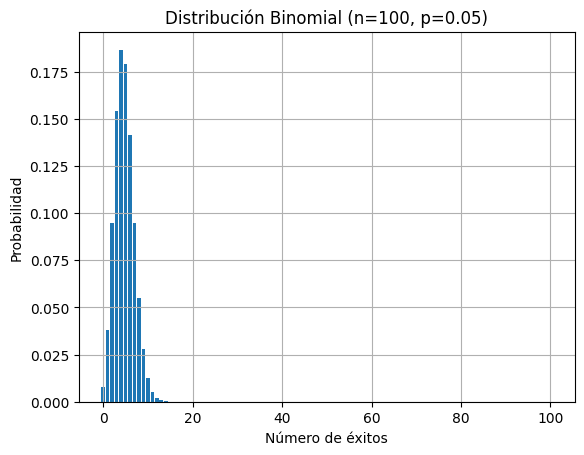

,x,P(X=x)
0,0,7.661967e-03
1,1,3.824926e-02
2,2,9.451722e-02
3,3,1.541340e-01
4,4,1.865920e-01
...,...,...
96,96,3.257663e-121
97,97,6.706211e-124
98,98,1.024838e-126
99,99,1.033553e-129


In [3]:
# ==========================================
# 4. Distribución Binomial - campeones en muestra de 30
# ==========================================
print("\n--- Distribución Binomial ---")
dist.analisis_binomial('dummy_campeon', n=100)


# DISTRIBUCION DE POISSON


--- Distribución de Poisson (Goles Marcados) ---


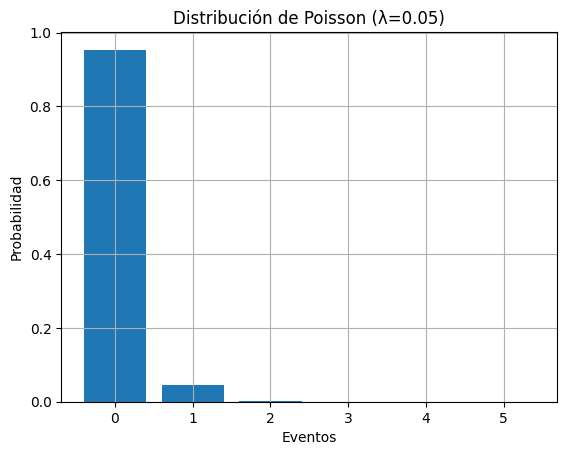

,x,P(X=x)
0,0,9.535653e-01
1,1,4.533949e-02
2,2,1.077886e-03
3,3,1.708353e-05
4,4,2.030691e-07
5,5,1.931079e-09


In [4]:
# ==========================================
# 5. Distribución de Poisson - Goles por jugador
# ==========================================
print("\n--- Distribución de Poisson (Goles Marcados) ---")
dist.analisis_poisson('dummy_campeon')


# DISTRIBUCION NORMAL


--- Distribución Normal (Edad en Mundial) ---


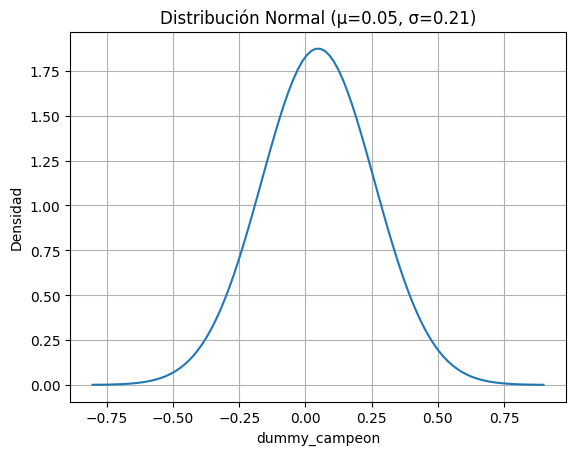


--- Prueba de normalidad (Shapiro-Wilk) ---
Shapiro-Wilk: W=0.2167, p=0.0000
Se rechaza H0: la variable no sigue una distribución normal.


d:\Archivos\Documentos\WILSON\GIT_HUB\Mundial_Inferences\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9296.
  res = hypotest_fun_out(*samples, **kwds)


In [5]:
# ==========================================
# 6. Distribución Normal y prueba de normalidad (Edad en Mundial)
# ==========================================
print("\n--- Distribución Normal (Edad en Mundial) ---")
dist.analisis_normal('dummy_campeon')

print("\n--- Prueba de normalidad (Shapiro-Wilk) ---")
dist.prueba_normalidad('dummy_campeon')

# PRUEBA T

In [6]:
# ==========================================
# 7. Prueba T: Edad entre campeones y no campeones
# ==========================================
print("\n--- Prueba t: Edad entre campeones y no campeones ---")
dist.prueba_t_media('edad_enMundial', 'dummy_campeon', 1, 0)


--- Prueba t: Edad entre campeones y no campeones ---
Prueba t: t=-1.1616, p=0.2459
No se rechaza H0: no hay diferencia significativa.


# ANOVA

In [7]:

# ==========================================
# 8. ANOVA: Edad por confederación
# ==========================================
print("\n--- ANOVA: Edad promedio por confederación ---")
grupos = [df_mundial[df_mundial['confederacion'] == c]['edad_enMundial'].dropna() 
          for c in df_mundial['confederacion'].unique()]
stat, p = stats.f_oneway(*grupos)
print(f"F = {stat:.4f}, p = {p:.4f}")


--- ANOVA: Edad promedio por confederación ---
F = 43.0818, p = 0.0000


# CONCLUSIONES

In [8]:
# ==========================================
# 9. Conclusiones preliminares
# ==========================================
print("\n--- Conclusiones preliminares ---")
print("- Las confederaciones con mayor proporción histórica de jugadores campeones son UEFA y CONMEBOL.")
print("  CONMEBOL presenta una mayor tasa relativa (~11.4%) de jugadores campeones, frente a ~4.9% en UEFA.")
print("- La prueba t para la edad promedio entre campeones y no campeones (p=0.2459) indica que no existe diferencia significativa.")
print("  Por tanto, la edad en Mundial no parece estar asociada de forma directa con haber sido campeón.")
print("- Al comparar P(confederación ∩ campeón) con P(confederación) * P(campeón), se observa dependencia:")
print("  CONMEBOL tiene muchos más campeones de lo esperado bajo independencia, mientras que el resto de confederaciones no presenta campeones.")
print("  Esto sugiere que la probabilidad de ser campeón depende de la confederación a la que se pertenece.")



--- Conclusiones preliminares ---
- Las confederaciones con mayor proporción histórica de jugadores campeones son UEFA y CONMEBOL.
  CONMEBOL presenta una mayor tasa relativa (~11.4%) de jugadores campeones, frente a ~4.9% en UEFA.
- La prueba t para la edad promedio entre campeones y no campeones (p=0.2459) indica que no existe diferencia significativa.
  Por tanto, la edad en Mundial no parece estar asociada de forma directa con haber sido campeón.
- Al comparar P(confederación ∩ campeón) con P(confederación) * P(campeón), se observa dependencia:
  CONMEBOL tiene muchos más campeones de lo esperado bajo independencia, mientras que el resto de confederaciones no presenta campeones.
  Esto sugiere que la probabilidad de ser campeón depende de la confederación a la que se pertenece.
